In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.subplots as sp
import klib

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project13/train-3.csv')

In [3]:
df.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [5]:
df.isnull().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [6]:
df_cleaned = df
df_cleaned.drop(columns=['id'], inplace=True)

In [7]:
df_cleaned.isnull().sum()

,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0
Policy Type,0


In [8]:
df_cleaned['Previous Claims'].unique()

array([ 2.,  1.,  0., nan,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [9]:
missing_columns = df_cleaned.columns[df_cleaned.isnull().sum() > 0]
int_column = ['Age', 'Number of Dependents', 'Previous Claims', 'Vehicle Age', 'Insurance Duration']

for col in missing_columns:
    if df_cleaned[col].dtype == 'object' or col in int_column:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
    else:
        df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)


<ipython-input-9-7a8e3750bed2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
<ipython-input-9-7a8e3750bed2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [10]:
df_cleaned['Previous Claims'].unique()

array([2., 1., 0., 3., 4., 5., 6., 7., 8., 9.])

In [11]:
int_column = ['Age', 'Number of Dependents', 'Previous Claims', 'Vehicle Age', 'Insurance Duration']

#for col in int_column:
#df_cleaned[int_column].astype(int)

#df_cleaned[int_column] = df_cleaned[int_column].astype(int)
# Convert specified columns to integers, handling non-numeric values
df_cleaned[int_column] = df_cleaned[int_column].apply(pd.to_numeric, errors='coerce').astype(int)


In [12]:
df_cleaned.isnull().sum()

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1200000 non-null  int64  
 1   Gender                1200000 non-null  object 
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1200000 non-null  object 
 4   Number of Dependents  1200000 non-null  int64  
 5   Education Level       1200000 non-null  object 
 6   Occupation            1200000 non-null  object 
 7   Health Score          1200000 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       1200000 non-null  int64  
 11  Vehicle Age           1200000 non-null  int64  
 12  Credit Score          1200000 non-null  float64
 13  Insurance Duration    1200000 non-null  int64  
 14  Policy Start Date     1200000 non-

In [14]:
df_cleaned['Policy Start Date'].unique()

array(['2023-12-23 15:21:39.134960', '2023-06-12 15:21:39.111551',
       '2023-09-30 15:21:39.221386', ..., '2021-04-28 15:21:39.129190',
       '2019-11-14 15:21:39.201446', '2020-10-19 15:21:39.118178'],
      dtype=object)

In [15]:
df_cleaned['Policy Start Date']= pd.to_datetime(df_cleaned['Policy Start Date'], errors='coerce')


In [16]:
df_cleaned['Policy Start Year'] = df_cleaned['Policy Start Date'].dt.year
df_cleaned['Policy Start Month'] = df_cleaned['Policy Start Date'].dt.month
df_cleaned['Policy Start Day'] = df_cleaned['Policy Start Date'].dt.day
df_cleaned.drop(columns=['Policy Start Date'], inplace=True)

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1200000 non-null  int64  
 1   Gender                1200000 non-null  object 
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1200000 non-null  object 
 4   Number of Dependents  1200000 non-null  int64  
 5   Education Level       1200000 non-null  object 
 6   Occupation            1200000 non-null  object 
 7   Health Score          1200000 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       1200000 non-null  int64  
 11  Vehicle Age           1200000 non-null  int64  
 12  Credit Score          1200000 non-null  float64
 13  Insurance Duration    1200000 non-null  int64  
 14  Customer Feedback     1200000 non-

# **Categorical Data**

In [18]:
#Categorical data
binary = [col for col in df_cleaned.columns if set(df_cleaned[col].unique()) <= {0, 1}]
category = [col for col in df_cleaned.select_dtypes(include = ['object','category']).columns]
category += binary

In [19]:
category

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

**EDA**

In [20]:
def plot_countplots_with_percentage(data, category, target='class'):
    # Create a 5x2 subplot figure
    fig = sp.make_subplots(rows=5, cols=2, subplot_titles=[f'{cat}' for cat in category])

    for i, cat in enumerate(category):
        row = (i // 2) + 1
        col = (i % 2) + 1

        # Calculate counts and percentages
        count_data = data[cat].value_counts().reset_index()
        count_data.columns = [cat, 'count']
        total_count = count_data['count'].sum()
        count_data['percentage'] = 100 * count_data['count'] / total_count

        fig.add_trace(
            go.Bar(
                x=count_data[cat],
                y=count_data['count'],
                text=count_data['percentage'].round(2).astype(str) + '%',
                textposition='auto'
            ),
            row=row, col=col
        )
        fig.update_layout(height=2000, width=1000, title_text="Count Plots")
    fig.update_yaxes(title_text='Count')

    fig.show()

# Example usage
plot_countplots_with_percentage(df_cleaned, category)

In [21]:
# Create contingency tables
contingency_tables = {
    'Gender': pd.crosstab(df_cleaned['Gender'], df_cleaned['Policy Type']),
    'Marital Status': pd.crosstab(df_cleaned['Marital Status'], df_cleaned['Policy Type']),
    'Education Level': pd.crosstab(df_cleaned['Education Level'], df_cleaned['Policy Type']),
    'Occupation': pd.crosstab(df_cleaned['Occupation'], df_cleaned['Policy Type']),
    'Location': pd.crosstab(df_cleaned['Location'], df_cleaned['Policy Type']),
    'Customer Feedback': pd.crosstab(df_cleaned['Customer Feedback'], df_cleaned['Policy Type']),
    'Smoking Status': pd.crosstab(df_cleaned['Smoking Status'], df_cleaned['Policy Type']),
    'Exercise Frequency': pd.crosstab(df_cleaned['Exercise Frequency'], df_cleaned['Policy Type']),
    'Property Type': pd.crosstab(df_cleaned['Property Type'], df_cleaned['Policy Type'])
}

# Plotting the contingency tables using Plotly with a blueish color scale
for key, table in contingency_tables.items():
    fig = go.Figure(data=go.Heatmap(
        z=table.values,
        x=table.columns,
        y=table.index,
        colorscale='Blues'
    ))

    fig.update_layout(
        title=f'Contingency Table for {key}',
           xaxis_title='class',
        yaxis_title=key
    )

    fig.show()

# **Numerical Data**

In [22]:
numeric = [col for col in df_cleaned.columns if col not in category]


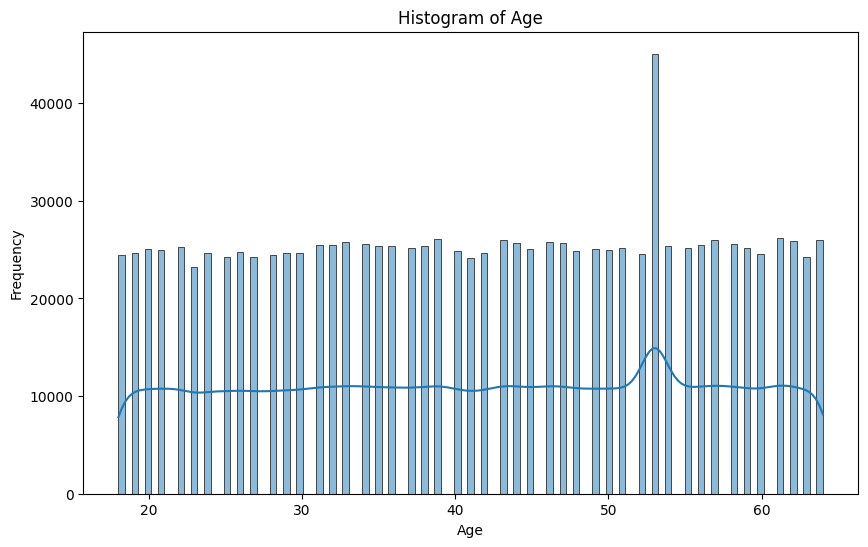

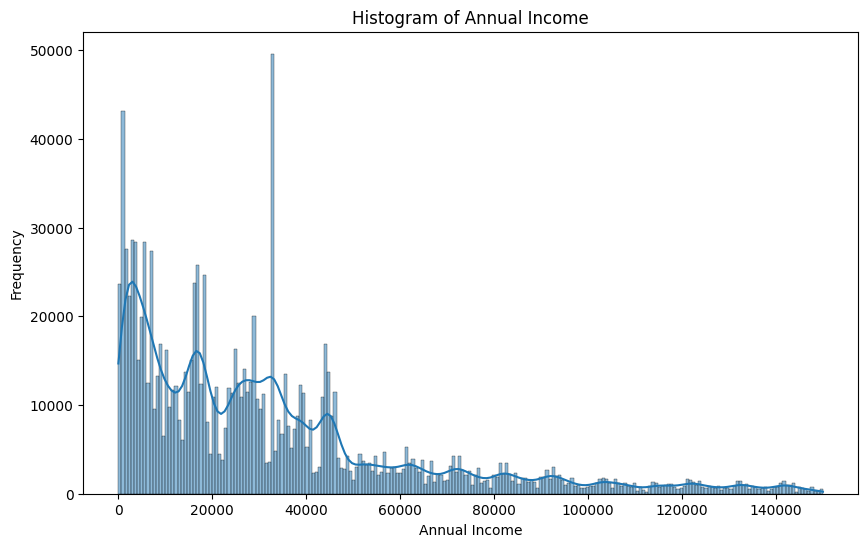

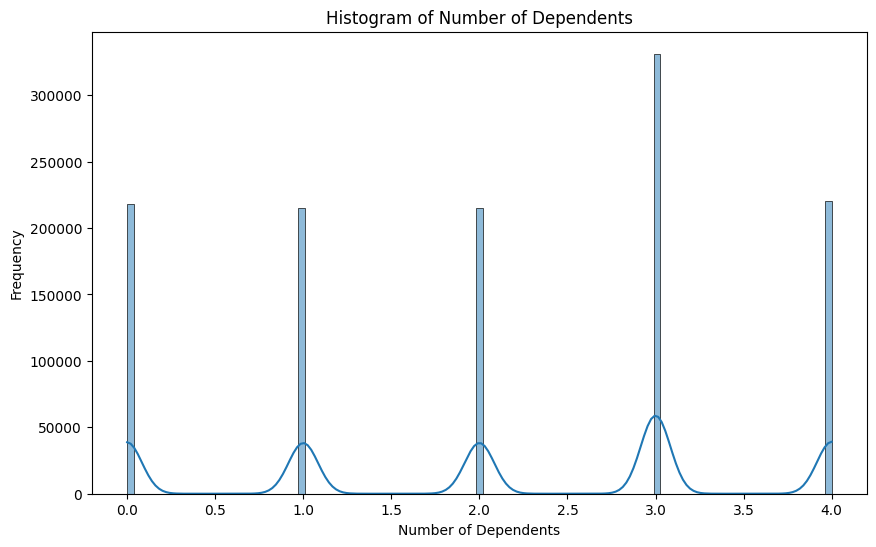

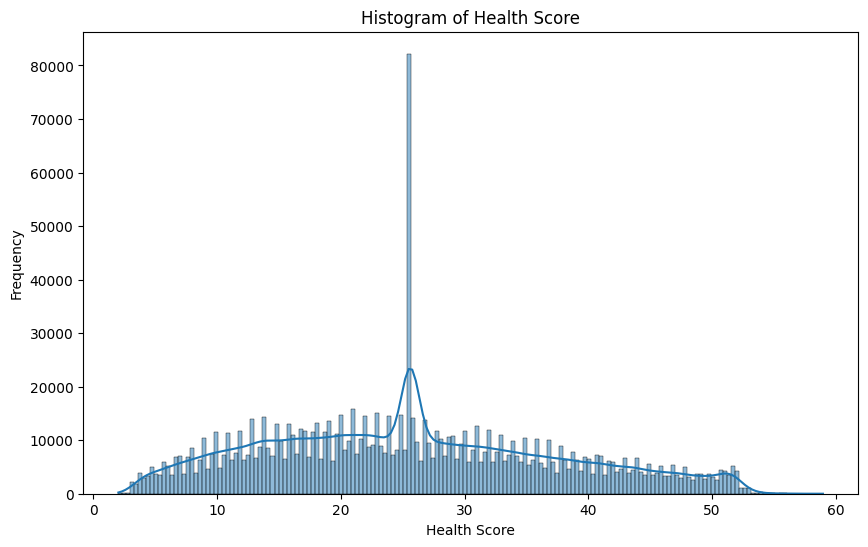

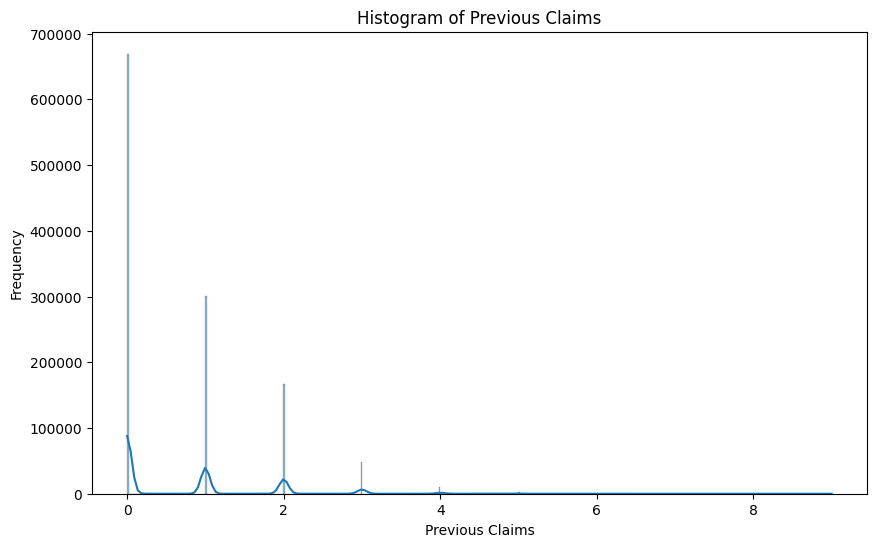

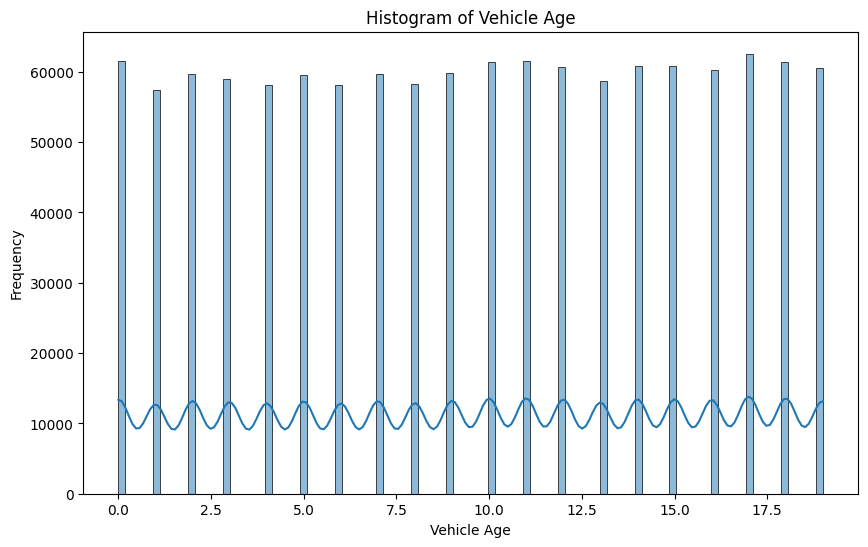

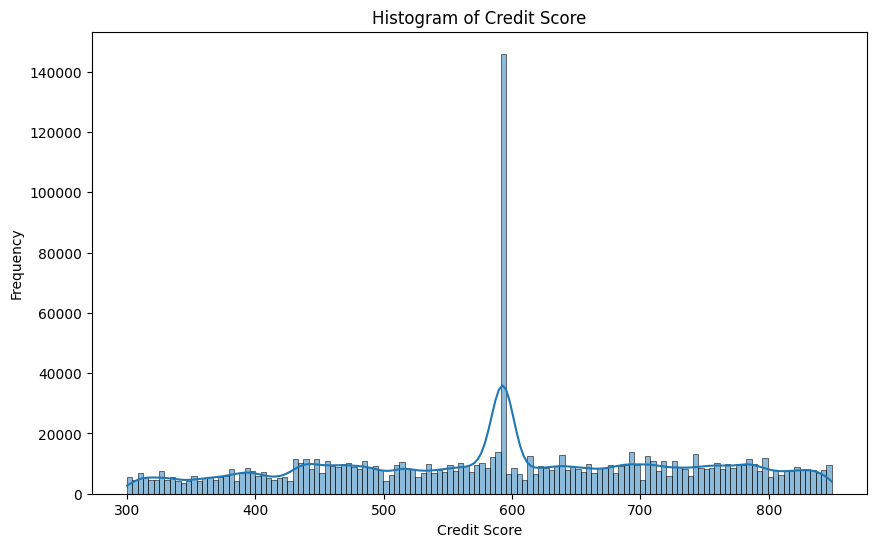

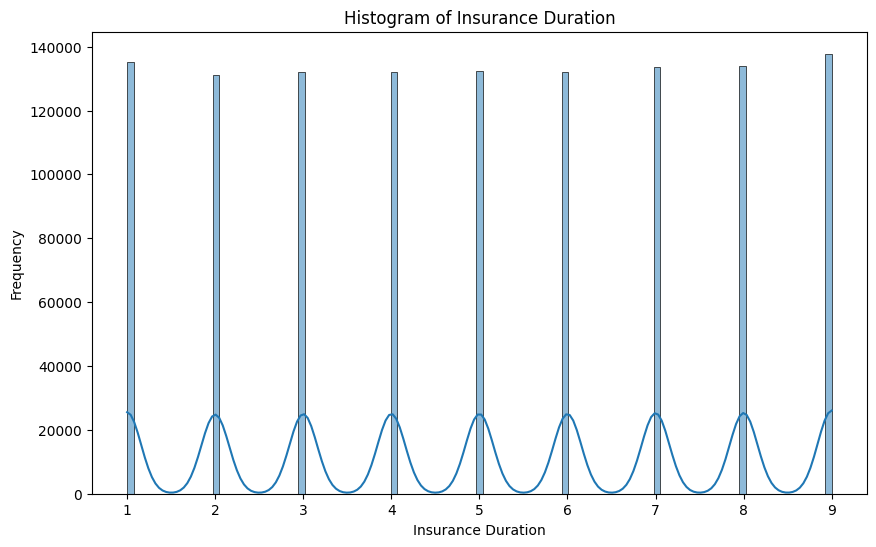

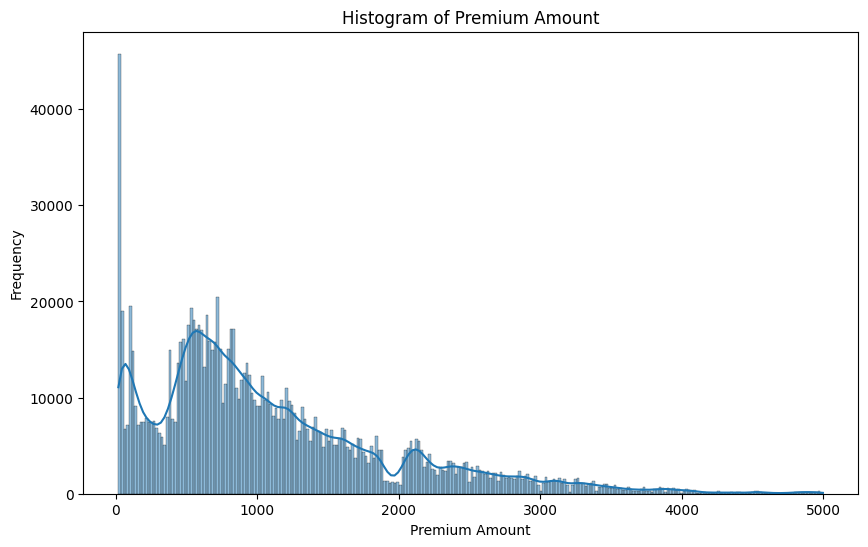

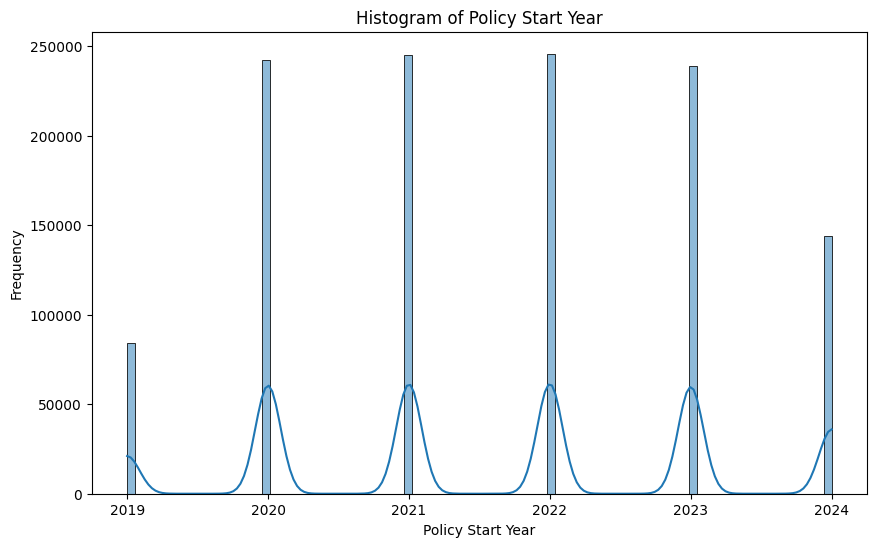

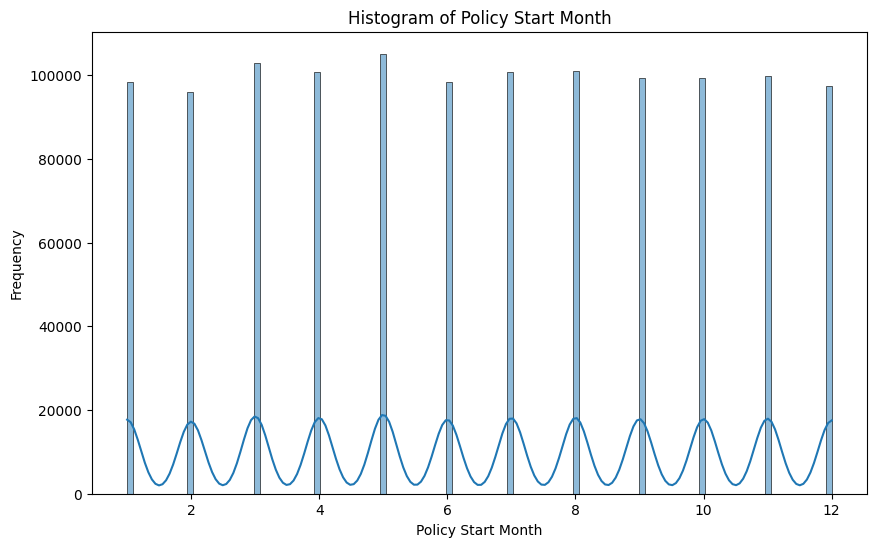

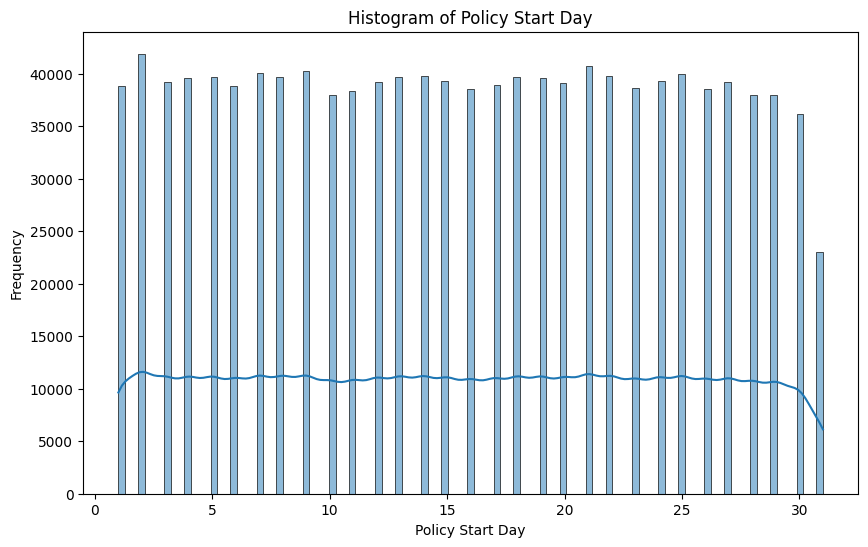

In [23]:
def plot_histograms_seaborn(df_cleaned, column_names):

    for col in column_names:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_cleaned[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

plot_histograms_seaborn(df_cleaned, numeric)

In [24]:
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns.remove('Policy Type')
train = pd.get_dummies(df_cleaned, columns = categorical_columns)

label_en = LabelEncoder()
train['Policy Type'] = label_en.fit_transform(train['Policy Type'])


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 40 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Age                          1200000 non-null  int64  
 1   Annual Income                1200000 non-null  float64
 2   Number of Dependents         1200000 non-null  int64  
 3   Health Score                 1200000 non-null  float64
 4   Policy Type                  1200000 non-null  int64  
 5   Previous Claims              1200000 non-null  int64  
 6   Vehicle Age                  1200000 non-null  int64  
 7   Credit Score                 1200000 non-null  float64
 8   Insurance Duration           1200000 non-null  int64  
 9   Premium Amount               1200000 non-null  float64
 10  Policy Start Year            1200000 non-null  int32  
 11  Policy Start Month           1200000 non-null  int32  
 12  Policy Start Day             1200000 non-n

In [26]:
train= klib.data_cleaning(train)

Shape of cleaned data: (1200000, 40) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 30.89 MB (-22.68%)



In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 40 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   age                          1200000 non-null  int8   
 1   annual_income                1200000 non-null  float64
 2   number_of_dependents         1200000 non-null  int8   
 3   health_score                 1200000 non-null  float32
 4   policy_type                  1200000 non-null  int8   
 5   previous_claims              1200000 non-null  int8   
 6   vehicle_age                  1200000 non-null  int8   
 7   credit_score                 1200000 non-null  float32
 8   insurance_duration           1200000 non-null  int8   
 9   premium_amount               1200000 non-null  float32
 10  policy_start_year            1200000 non-null  int32  
 11  policy_start_month           1200000 non-null  int32  
 12  policy_start_day             1200000 non-n

In [28]:
bool_columns = train.select_dtypes(include='bool').columns.tolist()
train[bool_columns] = train[bool_columns].astype(np.int8)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 40 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   age                          1200000 non-null  int8   
 1   annual_income                1200000 non-null  float64
 2   number_of_dependents         1200000 non-null  int8   
 3   health_score                 1200000 non-null  float32
 4   policy_type                  1200000 non-null  int8   
 5   previous_claims              1200000 non-null  int8   
 6   vehicle_age                  1200000 non-null  int8   
 7   credit_score                 1200000 non-null  float32
 8   insurance_duration           1200000 non-null  int8   
 9   premium_amount               1200000 non-null  float32
 10  policy_start_year            1200000 non-null  int32  
 11  policy_start_month           1200000 non-null  int32  
 12  policy_start_day             1200000 non-n

In [30]:

# Calculate the correlation matrix
correlation_matrix = train.iloc[:,1:].corr().round(2)

# Create a correlation heatmap using Plotly
fig = px.imshow(correlation_matrix,
                text_auto=True,
                aspect="auto",
                color_continuous_scale='Viridis',
                height=800)  # Increase the height of the figure

fig.update_layout(title='Correlation Heatmap',
                  xaxis_title='Variables',
                  yaxis_title='Variables')

fig.show()

# **Modeling**

In [34]:
# Example data
#X = train.iloc[:, [i for i in range(train.shape[1]) if i not in [0,8]]]
#y = train['']

X = train.drop(columns=['policy_type'])
y = train['policy_type']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

test_evaluation = {}

In [33]:
train['policy_type']

,policy_type
0,2
1,1
2,2
3,0
4,2


In [35]:
#Qanday imbalance bn kurashamiz
#pip install imblearn


smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [37]:

decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)

decision.fit(X_train, y_train)

y_pred_proba = decision.predict_proba(X_test)  # Predicted probabilities for each class
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

y_pred = decision.predict(X_test)
print(classification_report(y_test, y_pred))




ROC AUC Score: 0.49975036226696945
              precision    recall  f1-score   support

           0       0.33      0.33      0.33     79412
           1       0.34      0.34      0.34     80253
           2       0.33      0.33      0.33     80335

    accuracy                           0.33    240000
   macro avg       0.33      0.33      0.33    240000
weighted avg       0.33      0.33      0.33    240000



In [40]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred_proba = ada.predict_proba(X_test)  # Predicted probabilities for each class
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.5015809231383136
              precision    recall  f1-score   support

           0       0.33      0.30      0.32     79412
           1       0.33      0.37      0.35     80253
           2       0.34      0.33      0.33     80335

    accuracy                           0.34    240000
   macro avg       0.34      0.33      0.33    240000
weighted avg       0.34      0.34      0.33    240000



In [41]:
#Scaling
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred_proba = naive_bayes.predict_proba(X_test)  # Predicted probabilities for each class
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

y_pred = naive_bayes.predict(X_test)
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.5027014908033233
              precision    recall  f1-score   support

           0       0.34      0.36      0.35     79412
           1       0.33      0.27      0.30     80253
           2       0.34      0.37      0.35     80335

    accuracy                           0.34    240000
   macro avg       0.34      0.34      0.33    240000
weighted avg       0.34      0.34      0.33    240000



In [44]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_pred_proba = logistic.predict_proba(X_test)  # Predicted probabilities for each class
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.5021117381127073
              precision    recall  f1-score   support

           0       0.33      0.27      0.30     79412
           1       0.33      0.20      0.25     80253
           2       0.34      0.53      0.41     80335

    accuracy                           0.33    240000
   macro avg       0.33      0.33      0.32    240000
weighted avg       0.33      0.33      0.32    240000



In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred_proba = lda.predict_proba(X_test)  # Predicted probabilities for each class
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

y_pred = lda.predict(X_test)
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.5021207506780441
              precision    recall  f1-score   support

           0       0.33      0.29      0.31     79412
           1       0.33      0.23      0.27     80253
           2       0.33      0.49      0.40     80335

    accuracy                           0.33    240000
   macro avg       0.33      0.33      0.33    240000
weighted avg       0.33      0.33      0.33    240000



In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_pred_proba = mlp.predict_proba(X_test)  # Predicted probabilities for each class
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.4998684345390849
              precision    recall  f1-score   support

           0       0.33      0.23      0.27     79412
           1       0.33      0.21      0.26     80253
           2       0.34      0.56      0.42     80335

    accuracy                           0.33    240000
   macro avg       0.33      0.33      0.32    240000
weighted avg       0.33      0.33      0.32    240000



In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

y_pred_proba = xgb.predict_proba(X_test)  # Predicted probabilities for each class
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.5035922819286331
              precision    recall  f1-score   support

           0       0.33      0.33      0.33     79412
           1       0.34      0.31      0.32     80253
           2       0.34      0.37      0.35     80335

    accuracy                           0.34    240000
   macro avg       0.34      0.34      0.34    240000
weighted avg       0.34      0.34      0.34    240000

